### Analyzing scores of the Kneighborsclassifier algorithm for different values ​​of n_neighboors

All csv data files: https://machinelearningmastery.com/standard-machine-learning-datasets/


Data 1 - Pima Indians Diabetes
Data 2 - Banknote Authentication

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib notebook

In [130]:
def Knn_n_dependence(X,y,n_max):
    
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
    score = []
    
    for n in range(1,n_max):
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train,y_train)
        score.append(knn.score(X_test,y_test))
    
    %matplotlib inline
    
    fig,axs = plt.subplots()
    axs.set_xlabel("n_neighbors")
    axs.set_ylabel("Score")
    axs.set_title("Score KNN per n_neighbors")
    axs.set_xticks(np.arange(0,n,2))
    
    axs.plot(np.arange(1,n_max),score,'o-' ,linewidth = 2, color = 'black', label="Simulation")
    axs.axvline(score.index(max(score))+1,0,1, linestyle='--', color = 'red', label = 'Max = %f'%(max(scores)))
    axs.grid()
    axs.legend()
    return score

#### Colect Data 1 - Pima Indians Diabetes

In [111]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.columns = ['N-pregnant','Plasma-concentration','blood-pressure',
              'Triceps-skinfold','Insulin','Body-mass','Diabete-P-func','Age','Result']

In [112]:
df.head()

,N-pregnant,Plasma-concentration,blood-pressure,Triceps-skinfold,Insulin,Body-mass,Diabete-P-func,Age,Result
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


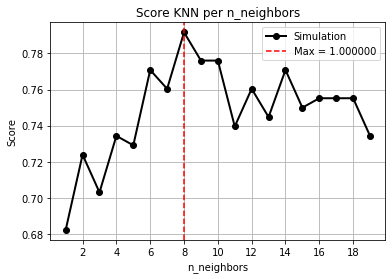

In [131]:
X = df[df.columns.difference(['Result'])]
y = df['Result']
scores = Knn_n_dependence(X,y,20)

#### Collect data 2 - Banknote Authentication

In [132]:
dfbk = pd.read_csv("data_banknote_authentication.txt")
dfbk.columns = ['Variance','Skewness','Kurtosis','Entropy','target']

In [134]:
dfbk.head()

,Variance,Skewness,Kurtosis,Entropy,target
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


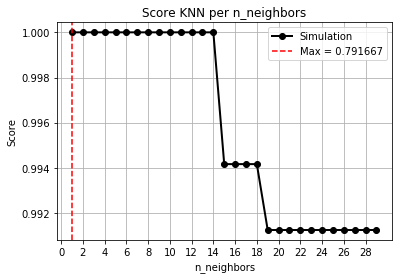

In [133]:
X = dfbk[dfbk.columns.difference(['target'])]
y = dfbk['target']

scores = Knn_n_dependence(X,y,n_max=30)